In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/twitter_dataset.csv",encoding="latin-1",names= ["target","id","date","flag","user","text"])

In [ ]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
data["flag"].unique()

array(['NO_QUERY'], dtype=object)

In [ ]:
data.nunique()

target          2
id        1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [ ]:
negative_user = data[data["target"] == 0 ]["user"]

In [ ]:
negative_user.value_counts()

lost_dog           549
tweetpet           310
webwoke            264
wowlew             210
mcraddictal        210
                  ... 
deeayy               1
AmandaHuttenga       1
BaltimoreLauren      1
megan_ambers         1
MEGANrofl            1
Name: user, Length: 415671, dtype: int64

In [ ]:
positive_user = data[data["target"]==4]["user"]

In [ ]:
positive_user.value_counts()

what_bugs_u    246
DarkPiano      231
VioletsCRUK    218
tsarnick       212
keza34         211
              ... 
mlle_elle        1
DaneCross        1
SonyaJMills      1
kristantyra      1
snazzshazz       1
Name: user, Length: 376569, dtype: int64

In [ ]:
data["target"].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
data=data.drop(["id","date","flag"],axis=1)

In [ ]:
data.head()

,target,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data["target"]=data["target"].map(lambda x : 1 if x == 4 else 0 )

In [ ]:
data.target.value_counts()

1    800000
0    800000
Name: target, dtype: int64

In [ ]:
negative_points=negative_user.value_counts()*(-1)

In [ ]:
negative_points

lost_dog       -549
tweetpet       -310
webwoke        -264
wowlew         -210
mcraddictal    -210
               ... 
sarahconomy      -1
boomboom1020     -1
stevieboox       -1
iamgendi         -1
SkeetBates       -1
Name: user, Length: 415671, dtype: int64

In [ ]:
temp = pd.DataFrame(data = [0]*len(data["user"].unique()) , index = data["user"].unique())

In [ ]:
temp

,0
_TheSpecialOne_,0
scotthamilton,0
mattycus,0
ElleCTF,0
Karoli,0
...,...
cathriiin,0
sdancingsteph,0
EvolveTom,0
AmandaMarie1028,0


In [ ]:
data.head()

,target,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
from string import punctuation
punctuation = punctuation.replace('@',"").replace('#',"")
punctuation

'!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

In [ ]:
data["clean_text"] = data["text"].map( lambda  text : text.lower())

In [ ]:
data.head()

,target,user,text,clean_text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [ ]:
pattern = "[@][\w_-]+"
data["clean_text"] = data["clean_text"].map(lambda text : re.sub(pattern,"__tag__",text))

In [ ]:
data.head()

,target,user,text,clean_text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","__tag__ http://twitpic.com/2y1zl - awww, that'..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,__tag__ i dived many times for the ball. manag...
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all....","__tag__ no, it's not behaving at all. i'm mad...."


In [ ]:
pattern = "http://twitpic.com/\w+"
data["clean_text"] = data["clean_text"].map(lambda text : re.sub(pattern,"__pic__",text))

In [ ]:
data.head()

,target,user,text,clean_text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","__tag__ __pic__ - awww, that's a bummer. you ..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,__tag__ i dived many times for the ball. manag...
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all....","__tag__ no, it's not behaving at all. i'm mad...."


In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I shall",
"i'll've": "I shall have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def change(text):
    for word in text.split(" "):
        if word in contractions:
            text = text.replace(word, contractions[word])
    return text

In [ ]:
data["clean_text"] = data["clean_text"].map(change)

In [ ]:
data.head()

,target,user,text,clean_text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","__tag__ __pic__ - awww, that has a bummer. yo..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,__tag__ i dived many times for the ball. manag...
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all....","__tag__ no, it has not behaving at all. I am m..."


In [ ]:
def remove_punc(text):
    from string import punctuation
    punctuation = punctuation.replace('_',"")
    punctuation = punctuation.replace('#',"")
    return text.translate(str.maketrans('', '',punctuation))

In [ ]:
data["clean_text"] = data["clean_text"].map(remove_punc)

In [ ]:
data.head()

,target,user,text,clean_text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",__tag__ __pic__ awww that has a bummer you s...
1,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,__tag__ i dived many times for the ball manage...
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",__tag__ no it has not behaving at all I am mad...


In [ ]:
data.drop("text",axis=1,inplace=True)

In [ ]:
data.head()

,target,user,clean_text
0,0,_TheSpecialOne_,__tag__ __pic__ awww that has a bummer you s...
1,0,scotthamilton,is upset that he cannot update his facebook by...
2,0,mattycus,__tag__ i dived many times for the ball manage...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,__tag__ no it has not behaving at all I am mad...


In [ ]:
data.to_csv("/content/drive/MyDrive/twitter/preprocessed_data.csv",index=False)


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/twitter/preprocessed_data.csv")
data.head()

,target,user,clean_text
0,0,_TheSpecialOne_,__tag__ __pic__ awww that has a bummer you s...
1,0,scotthamilton,is upset that he cannot update his facebook by...
2,0,mattycus,__tag__ i dived many times for the ball manage...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,__tag__ no it has not behaving at all I am mad...


In [ ]:
X = data["clean_text"]
y = data["target"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_cv.shape,y_cv.shape

((784000,), (480000,), (784000,), (480000,), (336000,), (336000,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(stop_words= "english", max_features=15000)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_cv_vec = vectorizer.transform(X_cv)

In [ ]:
X_train_vec.shape,X_test_vec.shape,X_cv_vec.shape

((784000, 15000), (480000, 15000), (336000, 15000))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0.001,0.01,0.1,0.5,1,5,10,100]
train_scores = list()
cv_scores = list()
for a in alphas:
  model = MultinomialNB(alpha=a)
  model.fit(X_train_vec,y_train)
  train_scores.append(model.score(X_train_vec,y_train))
  cv_scores.append(model.score(X_cv_vec,y_cv))

In [ ]:
train_scores,cv_scores

([0.7685331632653061,
  0.7685344387755102,
  0.7685191326530613,
  0.7685420918367347,
  0.7685408163265306,
  0.7680076530612245,
  0.767376275510204,
  0.7593826530612245],
 [0.7623095238095238,
  0.7623035714285714,
  0.7623125,
  0.7624553571428572,
  0.7625327380952381,
  0.7628779761904761,
  0.7628065476190476,
  0.7579047619047619])

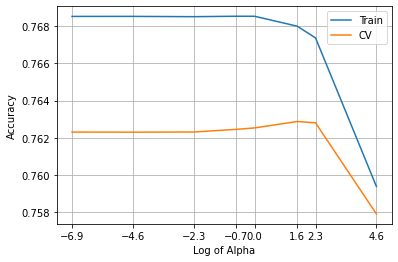

In [ ]:
plt.plot(np.log(alphas),train_scores,label= "Train")
plt.plot(np.log(alphas),cv_scores,label="CV")
plt.grid(True)
plt.xticks(np.log(alphas))
plt.legend()
plt.xlabel("Log of Alpha")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
alphas

[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]

In [ ]:
cv_scores

[0.7623095238095238,
 0.7623035714285714,
 0.7623125,
 0.7624553571428572,
 0.7625327380952381,
 0.7628779761904761,
 0.7628065476190476,
 0.7579047619047619]

In [ ]:
index_of_best_score = np.argmax(cv_scores)

In [ ]:
best_alpha = alphas[index_of_best_score]

In [ ]:
model = MultinomialNB(alpha = best_alpha)
model.fit(X_train_vec,y_train)
model.score(X_test_vec,y_test)

0.7619708333333334

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(max_features=20000)
x_train_tf_idf = tf_idf.fit_transform(X_train)

In [ ]:
x_test_tf_idf = tf_idf.transform(X_test)

In [ ]:
x_cv_tf_idf = tf_idf.transform(X_cv)

In [ ]:
x_train_tf_idf.shape,x_test_tf_idf.shape,x_cv_tf_idf.shape

((784000, 20000), (480000, 20000), (336000, 20000))

In [ ]:
alphas=[0,0.5,1,5,10,20,50,100]
cv_scores=[]
train_scores=[]
for a in alphas:
  model=MultinomialNB(alpha=a)
  model.fit(x_train_tf_idf,y_train)
  train_scores.append(model.score(x_train_tf_idf,y_train))
  cv_scores.append(model.score(x_cv_tf_idf,y_cv))
print(cv_scores,train_scores)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[0.4997738095238095, 0.5000654761904761, 0.5002529761904762, 0.49996726190476193, 0.49995535714285716, 0.5001696428571428, 0.5005565476190477, 0.5010386904761904] [0.7822525510204081, 0.7827831632653062, 0.7831326530612245, 0.7839974489795918, 0.7838061224489796, 0.7828456632653061, 0.7797997448979592, 0.7763176020408163]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


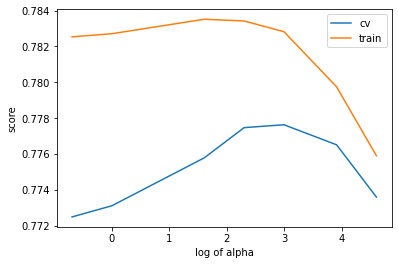

In [ ]:
plt.plot(np.log(alphas),cv_scores,label="cv")
plt.plot(np.log(alphas),train_scores,label="train")
plt.legend()
plt.xlabel("log of alpha")
plt.ylabel("score")
plt.show()

In [ ]:
best_score_index=np.argmax(cv_scores)
best_score_index

5

In [ ]:
best_alpha=alphas[best_score_index]
best_alpha

20

In [ ]:
count_vec=CountVectorizer(ngram_range=(1,2),max_features=15000)
x_train_biagram=count_vec.fit_transform(X_train)
x_cv_biagram=count_vec.transform(X_cv)
x_test_biagram=count_vec.transform(X_test)

In [ ]:
x_train_biagram.shape,x_cv_biagram.shape,x_test_biagram.shape

((784000, 15000), (336000, 15000), (480000, 15000))

In [ ]:
alphas=[0,0.1,0.5,1,2,5,10,50,100]
train_biagram_scores=[]
cv_biagram_scores=[]
for a in alphas:
  model=MultinomialNB(alpha=a)
  model.fit(x_train_biagram,y_train)
  train_biagram_scores.append(model.score(x_train_biagram,y_train))
  cv_biagram_scores.append(model.score(x_cv_biagram,y_cv))
print(train_biagram_scores,cv_biagram_scores)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[0.7877066326530612, 0.7877015306122449, 0.7876709183673469, 0.7876186224489796, 0.7875382653061225, 0.7872308673469388, 0.7867908163265306, 0.7837423469387755, 0.7803724489795918] [0.7858988095238095, 0.7858958333333333, 0.785875, 0.7858214285714286, 0.7856755952380953, 0.7854285714285715, 0.7850714285714285, 0.7827589285714286, 0.7798541666666666]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


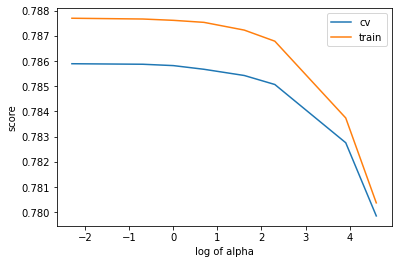

In [ ]:
plt.plot(np.log(alphas),cv_biagram_scores,label="cv")
plt.plot(np.log(alphas),train_biagram_scores,label="train")
plt.legend()
plt.xlabel("log of alpha")
plt.ylabel("score")
plt.show()

In [ ]:
best_biagram_cv_scores=np.argmax(cv_biagram_scores)
best_biagram_cv_scores

0

In [ ]:
best_alpha_biagram_scores=alphas[best_biagram_cv_scores]
best_alpha_biagram_scores

0

In [ ]:
biagram=MultinomialNB(alpha=best_alpha_biagram_scores)
biagram.fit(x_train_biagram,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


MultinomialNB(alpha=0)

In [ ]:
biagram.score(x_test_biagram,y_test),biagram.score(x_train_biagram,y_train)

(0.7842208333333334, 0.7877066326530612)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer(max_features=15000)
X_train_bow=count_vector.fit_transform(X_train)
X_cv_bow=count_vector.transform(X_cv)
X_test_bow=count_vector.transform(X_test)

In [ ]:
X_train_bow.shape,X_cv_bow.shape,X_test_bow.shape

((784000, 15000), (336000, 15000), (480000, 15000))

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.5,max_iter=1000)
model.fit(X_train_bow,y_train)
model.score(X_train_bow,y_train)


0.8039311224489796

In [ ]:
model.score(X_test_bow,y_test)

0.79464375